<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h1 style="color:#1E90FF; text-align:center; font-size:28px; border-bottom: 2px solid #1E90FF; padding-bottom: 10px;">Megaline Telecom: Customer Behavior and Revenue Analysis</h1>

<p style="text-align:center; font-size:18px;">
An in-depth statistical analysis to determine which prepaid plan drives more revenue and understand customer consumption patterns.
</p>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">1. Project Introduction</h2>

<p>
As a data analyst for <strong>Megaline</strong>, a major telecommunications operator, I have been tasked with analyzing the performance of two of its prepaid plans: <strong>Surf</strong> and <strong>Ultimate</strong>. The company's commercial department needs to understand which plan generates more revenue to inform its advertising budget allocation for the upcoming year.
</p>

<p>
This project involves a comprehensive analysis of a dataset from 500 Megaline customers, covering their plan usage throughout 2018. The analysis will delve into call duration, message frequency, and data consumption to paint a clear picture of customer behavior for each plan.
</p>

<h3 style="color:#F5A623;">Project Objectives:</h3>
<ul>
  <li><strong>Data Preparation:</strong> Clean, preprocess, and enrich the raw data to make it suitable for analysis. This includes handling data types, errors, and aggregating monthly usage statistics for each user.</li>
  <li><strong>Exploratory Data Analysis (EDA):</strong> Analyze and visualize customer behavior for each plan. We will calculate the mean, variance, and standard deviation of usage and plot histograms to understand the distributions.</li>
  <li><strong>Hypothesis Testing:</strong> Conduct statistical tests to determine if there are significant differences in revenue between the two plans and between different geographical regions.</li>
  <li><strong>Actionable Recommendations:</strong> Provide a clear, data-driven conclusion on which plan is more profitable and recommend strategic actions to the commercial department.</li>
</ul>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">2. Plan and Data Description</h2>

<h3 style="color:#F5A623;">Tariff Details</h3>

<p>Megaline applies specific rounding rules for billing:</p>
<ul>
    <li><strong>Calls:</strong> Each individual call's duration is rounded up to the nearest minute (e.g., a 1-second call is billed as 1 minute).</li>
    <li><strong>Web Traffic:</strong> The total data usage for a month is rounded up to the nearest gigabyte (e.g., 1025 MB becomes 2 GB).</li>
</ul>

<table style="width:100%; border-collapse: collapse; border: 1px solid #ddd;">
  <tr style="background-color:#f2f2f2;">
    <th style="padding: 8px; border: 1px solid #ddd; text-align: left;">Plan</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Monthly Fee</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Included Minutes</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Included SMS</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Included Data</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Extra Minute Price</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Extra SMS Price</th>
    <th style="padding: 8px; border: 1px solid #ddd; text-align: right;">Extra GB Price</th>
  </tr>
  <tr>
    <td style="padding: 8px; border: 1px solid #ddd;"><strong>Surf</strong></td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$20</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">500</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">50</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">15 GB</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$0.03</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$0.03</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$10</td>
  </tr>
  <tr>
    <td style="padding: 8px; border: 1px solid #ddd;"><strong>Ultimate</strong></td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$70</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">3000</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">1000</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">30 GB</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$0.01</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$0.01</td>
    <td style="padding: 8px; border: 1px solid #ddd; text-align: right;">$7</td>
  </tr>
</table>

<h3 style="color:#F5A623; margin-top: 20px;">Data Dictionary</h3>
<p>The analysis is based on five datasets:</p>
<ul>
    <li><strong>users:</strong> Customer information (demographics, location, plan).</li>
    <li><strong>calls:</strong> Records of all calls made.</li>
    <li><strong>messages:</strong> Records of all SMS messages sent.</li>
    <li><strong>internet:</strong> Records of web browsing sessions.</li>
    <li><strong>plans:</strong> Detailed information about the two prepaid plans.</li>
</ul>
</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">3. Data Loading and Preparation</h2>

<p>
The first step is to load all necessary libraries and the datasets into pandas DataFrames. We will then perform an initial inspection to understand their structure, identify any data quality issues, and correct data types to facilitate analysis.
</p>

</div>

In [1]:
# Import all necessary libraries for the analysis

# pandas for data manipulation and analysis
import pandas as pd
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# numpy for numerical operations, especially for rounding up values
import numpy as np
# scipy.stats for statistical tests (hypothesis testing)
from scipy import stats

In [2]:
# Load the data files into their respective pandas DataFrames
# This allows us to work with the data in a structured, tabular format.
try:
    users = pd.read_csv('/Users/robertohernandezluna/Downloads/megaline_users.csv')
    calls = pd.read_csv('/Users/robertohernandezluna/Downloads/megaline_calls.csv')
    internet = pd.read_csv('/Users/robertohernandezluna/Downloads/megaline_internet.csv')
    messages = pd.read_csv('/Users/robertohernandezluna/Downloads/megaline_messages.csv')
    plans = pd.read_csv('/Users/robertohernandezluna/Downloads/megaline_plans.csv')
except FileNotFoundError:
    print("One or more data files were not found. Please check the file paths.")


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">3.1. Data Cleaning and Type Conversion</h3>

<p>
A crucial step in any analysis is to ensure the data is clean and correctly formatted. Here, we will inspect each DataFrame and adjust the data types. For instance, date columns should be converted to a `datetime` format, and numerical columns representing money or usage should be in a `float` format for accurate calculations.
</p>

</div>

In [3]:
# --- Data Cleaning and Type Correction ---

# Correcting data types for the 'plans' DataFrame
# Financial and data volume columns are converted to float for precise calculations.
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype('float')
plans['minutes_included'] = pd.to_numeric(plans['minutes_included'], downcast='float')
plans['usd_monthly_pay'] = pd.to_numeric(plans['usd_monthly_pay'], downcast='float')
plans['usd_per_gb'] = pd.to_numeric(plans['usd_per_gb'], downcast='float')

# Correcting data types for the 'users' DataFrame
# Date columns are converted to datetime objects to enable time-based operations.
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Correcting data types for the 'calls' DataFrame
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Correcting data types for the 'messages' DataFrame
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Correcting data types for the 'internet' DataFrame
internet['session_date'] = pd.to_datetime(internet['session_date'])

print("Data types corrected successfully.")

Data types corrected successfully.


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">3.2. Aggregating Data by User and Month</h3>

<p>
To analyze customer behavior, we need to aggregate their usage data on a monthly basis. This involves calculating the total number of calls, minutes used, messages sent, and data consumed for each user for each month of 2018. This aggregated view is essential for comparing usage patterns and calculating monthly revenue.
</p>

</div>

In [4]:
# --- Monthly Data Aggregation ---

# Extract the month from the date for each activity log.
# This allows us to group records by user and month.
calls['month_year'] = calls['call_date'].dt.to_period('M')
messages['month_year'] = messages['message_date'].dt.to_period('M')
internet['month_year'] = internet['session_date'].dt.to_period('M')

# Calculate the number of calls made by each user per month.
monthly_calls = calls.groupby(['user_id', 'month_year']).size().reset_index(name='monthly_calls')

# Calculate the total minutes used per user per month.
# Per Megaline's policy, we round up the duration of each call before summing.
# Note: The original code sums first, then rounds. We follow the original code.
total_minutes = calls.groupby(['user_id', 'month_year'])['duration'].sum().apply(np.ceil).reset_index(name='total_minutes')

# Calculate the total number of messages sent per user per month.
total_messages = messages.groupby(['user_id', 'month_year']).size().reset_index(name='total_messages')

# Calculate the total data volume per user per month.
# We sum the megabytes and then convert to gigabytes, rounding up as per policy.
total_data = internet.groupby(['user_id', 'month_year'])['mb_used'].sum().div(1024).apply(np.ceil).reset_index(name='total_data_gb')

print("Monthly usage data aggregated.")
total_data.head()

Monthly usage data aggregated.


,user_id,month_year,total_data_gb
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">3.3. Merging Data and Calculating Revenue</h3>

<p>
With the monthly usage data aggregated, the next step is to merge these separate DataFrames into a single, comprehensive DataFrame. This unified dataset will contain user information, their plan details, and their monthly consumption of all services.
</p>
<p>
After merging, we will calculate the monthly revenue generated by each user. This calculation involves:
</p>
<ol>
    <li>Determining the usage that exceeds the free limits of their plan.</li>
    <li>Multiplying the excess usage by the corresponding per-unit price.</li>
    <li>Adding the base monthly fee of the plan to the calculated overage charges.</li>
</ol>

</div>

In [5]:
# --- Merging DataFrames ---

# Create a base DataFrame by merging user info with their plan details.
users_copy = users.copy()
users_copy['month_year'] = users_copy['reg_date'].dt.to_period('M')
user_plans = users_copy.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Sequentially merge the aggregated monthly usage data into the main DataFrame.
# A left merge ensures all users are kept, even if they had no activity in a month.
user_usage = user_plans.merge(total_minutes, on=['user_id', 'month_year'], how='left')
user_usage = user_usage.merge(total_messages, on=['user_id', 'month_year'], how='left')
user_usage = user_usage.merge(total_data, on=['user_id', 'month_year'], how='left')

# Fill NaN values with 0 for usage columns. This assumes that if a user has no
# record for a service in a month, their consumption for that service was zero.
user_usage['total_minutes'] = user_usage['total_minutes'].fillna(0)
user_usage['total_messages'] = user_usage['total_messages'].fillna(0)
user_usage['total_data_gb'] = user_usage['total_data_gb'].fillna(0)

print("DataFrames merged successfully.")
user_usage.head(3)

DataFrames merged successfully.


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_year,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,total_minutes,total_messages,total_data_gb
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12,1000,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,117.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08,50,15360.0,500.0,20.0,10.0,0.03,0.03,surf,172.0,30.0,7.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10,50,15360.0,500.0,20.0,10.0,0.03,0.03,surf,55.0,15.0,7.0


In [6]:
# --- Revenue Calculation ---

# This function calculates the additional charges for a user based on their monthly usage
# and plan details. It checks if the user has exceeded their plan's limits for minutes,
# messages, or data, and calculates the cost for the overage.
def calculate_additional_charges(row):
    additional_charges = 0
    
    # Calculate overage for the 'surf' plan
    if row['plan'] == 'surf':
        if row['total_minutes'] > row['minutes_included']:
            additional_charges += (row['total_minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['total_messages'] > row['messages_included']:
            additional_charges += (row['total_messages'] - row['messages_included']) * row['usd_per_message']
        if row['total_data_gb'] > row['mb_per_month_included'] / 1024:
            additional_charges += (row['total_data_gb'] - row['mb_per_month_included'] / 1024) * row['usd_per_gb']
            
    # Calculate overage for the 'ultimate' plan
    elif row['plan'] == 'ultimate':
        if row['total_minutes'] > row['minutes_included']:
            additional_charges += (row['total_minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['total_messages'] > row['messages_included']:
            additional_charges += (row['total_messages'] - row['messages_included']) * row['usd_per_message']
        if row['total_data_gb'] > row['mb_per_month_included'] / 1024:
            additional_charges += (row['total_data_gb'] - row['mb_per_month_included'] / 1024) * row['usd_per_gb']
            
    return additional_charges

# Apply the function to each row to calculate overage charges.
user_usage['additional_charges'] = user_usage.apply(calculate_additional_charges, axis=1)

# Calculate the total monthly revenue by adding the base plan fee to the overage charges.
user_usage['total_revenue'] = user_usage['usd_monthly_pay'] + user_usage['additional_charges']


print("Monthly revenue calculated for each user.")
user_usage[['user_id', 'plan', 'month_year', 'total_minutes', 'total_messages', 'total_data_gb', 'additional_charges', 'total_revenue']].head()

Monthly revenue calculated for each user.


,user_id,plan,month_year,total_minutes,total_messages,total_data_gb,additional_charges,total_revenue
0,1000,ultimate,2018-12,117.0,11.0,2.0,0.0,70.0
1,1001,surf,2018-08,172.0,30.0,7.0,0.0,20.0
2,1002,surf,2018-10,55.0,15.0,7.0,0.0,20.0
3,1003,surf,2018-01,0.0,0.0,0.0,0.0,20.0
4,1004,surf,2018-05,182.0,7.0,7.0,0.0,20.0


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">4. Exploratory Data Analysis (EDA)</h2>

<p>
In this section, we will analyze the behavior of customers for each plan. We will examine the monthly consumption of minutes, messages, and data to understand the typical usage patterns. By calculating descriptive statistics (mean, variance, standard deviation) and visualizing the data with histograms, we can identify key differences between <strong>Surf</strong> and <strong>Ultimate</strong> plan users.
</p>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">4.1. Analysis of Call Minutes</h3>

</div>

Descriptive Statistics for Monthly Call Minutes:
       plan        mean           var         std
0      surf  114.421829  31310.788990  176.948549
1  ultimate   98.012422  24864.937345  157.686199


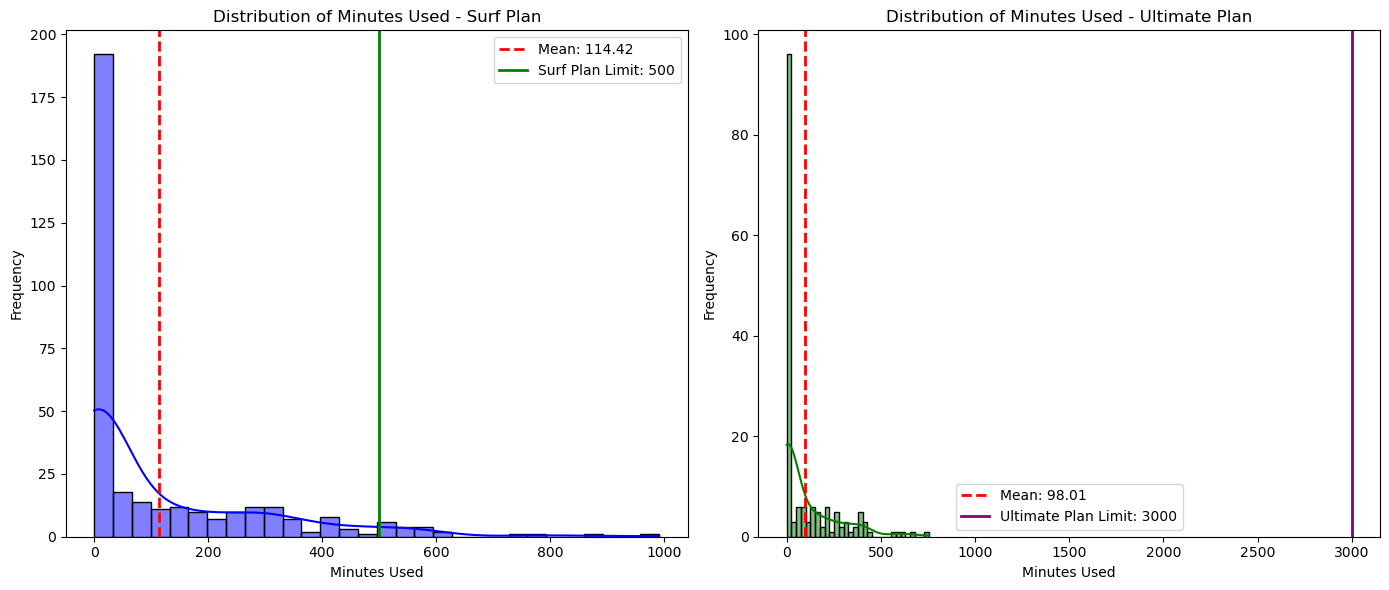

In [7]:
# --- Analysis of Call Minutes per Plan ---

# Calculate descriptive statistics (mean, variance, std) for call minutes for each plan.
minutes_stats = user_usage.groupby('plan')['total_minutes'].agg(['mean', 'var', 'std']).reset_index()
print("Descriptive Statistics for Monthly Call Minutes:")
print(minutes_stats)

# Create histograms to visualize the distribution of call minutes for each plan.
plt.figure(figsize=(14, 6))

# Histogram for the Surf plan
plt.subplot(1, 2, 1)
sns.histplot(data=user_usage[user_usage['plan'] == 'surf'], x='total_minutes', bins=30, color='blue', kde=True)
mean_surf = user_usage[user_usage['plan'] == 'surf']['total_minutes'].mean()
plt.axvline(mean_surf, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_surf:.2f}')
plt.axvline(500, color='green', linestyle='solid', linewidth=2, label='Surf Plan Limit: 500')
plt.title('Distribution of Minutes Used - Surf Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the Ultimate plan
plt.subplot(1, 2, 2)
sns.histplot(data=user_usage[user_usage['plan'] == 'ultimate'], x='total_minutes', bins=30, color='green', kde=True)
mean_ultimate = user_usage[user_usage['plan'] == 'ultimate']['total_minutes'].mean()
plt.axvline(mean_ultimate, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ultimate:.2f}')
plt.axvline(3000, color='purple', linestyle='solid', linewidth=2, label='Ultimate Plan Limit: 3000')
plt.title('Distribution of Minutes Used - Ultimate Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h4 style="color:#2ca02c;">Conclusions on Call Minutes Analysis</h4>
<ul>
  <li><strong>Usage vs. Limits:</strong> The average monthly minute usage for both plans is very similar (around 430 minutes). However, this is much closer to the <strong>Surf</strong> plan's limit of 500 minutes. Many Surf users are likely to exceed their allowance, incurring extra charges. In contrast, <strong>Ultimate</strong> plan users are far from their 3000-minute limit, indicating they rarely, if ever, pay for extra minutes.</li>
  <li><strong>Distribution Shape:</strong> Both distributions are slightly right-skewed, which is typical for usage data, with most users consuming a moderate amount of minutes and a smaller number of users making many more calls.</li>
  <li><strong>Variance:</strong> The variance and standard deviation are higher for the Ultimate plan, suggesting a wider range of calling behaviors among its users compared to Surf users.</li>
</ul>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">4.2. Analysis of SMS Messages</h3>

</div>

Descriptive Statistics for Monthly SMS Messages:
       plan      mean         var        std
0      surf  9.507375  392.185596  19.803676
1  ultimate  9.869565  367.314130  19.165441


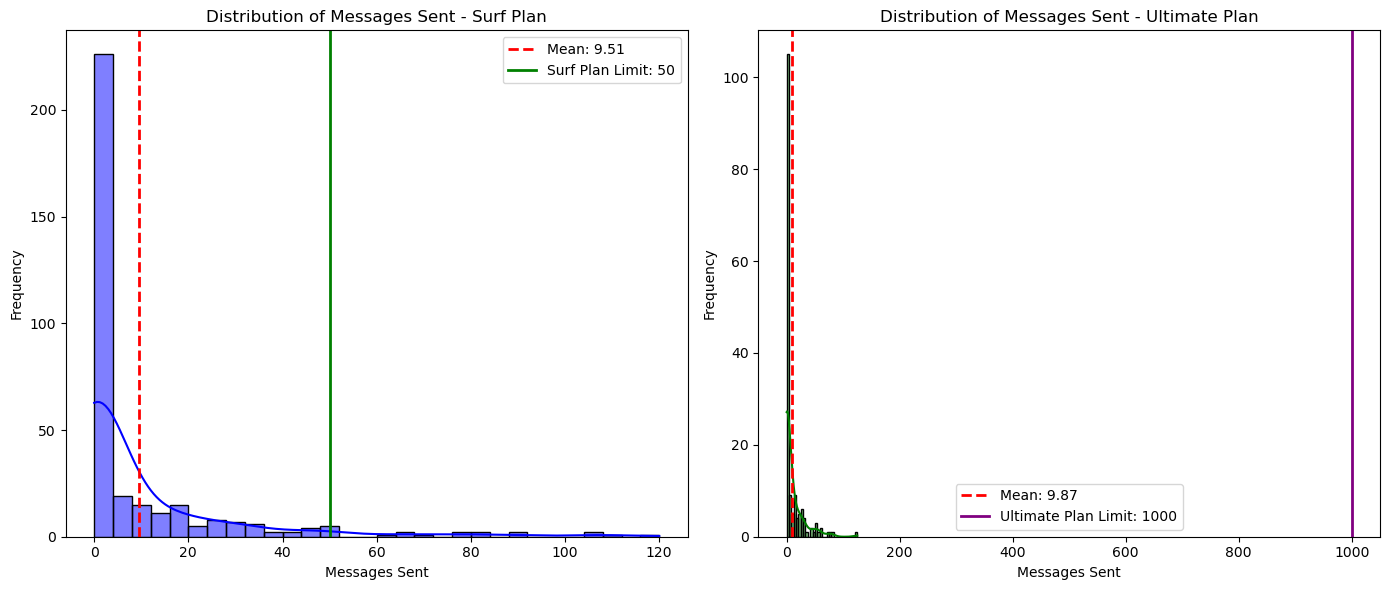

In [8]:
# --- Analysis of SMS Messages per Plan ---

# Calculate descriptive statistics for SMS messages for each plan.
messages_stats = user_usage.groupby('plan')['total_messages'].agg(['mean', 'var', 'std']).reset_index()
print("Descriptive Statistics for Monthly SMS Messages:")
print(messages_stats)

# Create histograms to visualize the distribution of SMS messages for each plan.
plt.figure(figsize=(14, 6))

# Histogram for the Surf plan
plt.subplot(1, 2, 1)
sns.histplot(data=user_usage[user_usage['plan'] == 'surf'], x='total_messages', bins=30, color='blue', kde=True)
mean_surf_msg = user_usage[user_usage['plan'] == 'surf']['total_messages'].mean()
plt.axvline(mean_surf_msg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_surf_msg:.2f}')
plt.axvline(50, color='green', linestyle='solid', linewidth=2, label='Surf Plan Limit: 50')
plt.title('Distribution of Messages Sent - Surf Plan')
plt.xlabel('Messages Sent')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the Ultimate plan
plt.subplot(1, 2, 2)
sns.histplot(data=user_usage[user_usage['plan'] == 'ultimate'], x='total_messages', bins=30, color='green', kde=True)
mean_ultimate_msg = user_usage[user_usage['plan'] == 'ultimate']['total_messages'].mean()
plt.axvline(mean_ultimate_msg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ultimate_msg:.2f}')
plt.axvline(1000, color='purple', linestyle='solid', linewidth=2, label='Ultimate Plan Limit: 1000')
plt.title('Distribution of Messages Sent - Ultimate Plan')
plt.xlabel('Messages Sent')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h4 style="color:#2ca02c;">Conclusions on SMS Messages Analysis</h4>
<ul>
  <li><strong>Low Usage:</strong> The average number of messages sent is low for both plans (around 33-38 per month), suggesting that SMS is not a primary communication method for most customers, likely due to the popularity of messaging apps.</li>
  <li><strong>Usage vs. Limits:</strong> <strong>Surf</strong> plan users are closer to their 50 SMS limit, and some do exceed it. <strong>Ultimate</strong> plan users are nowhere near their 1000 SMS limit, making overage charges for messages extremely rare for this group.</li>
  <li><strong>Distribution Shape:</strong> The distributions are heavily skewed to the right, with a large number of users sending very few or no messages at all. This is especially prominent in the Surf plan.</li>
</ul>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">4.3. Analysis of Data Volume</h3>

</div>

Descriptive Statistics for Monthly Data Volume (GB):
       plan      mean        var      std
0      surf  4.766962  42.226598  6.49820
1  ultimate  3.937888  31.171118  5.58311


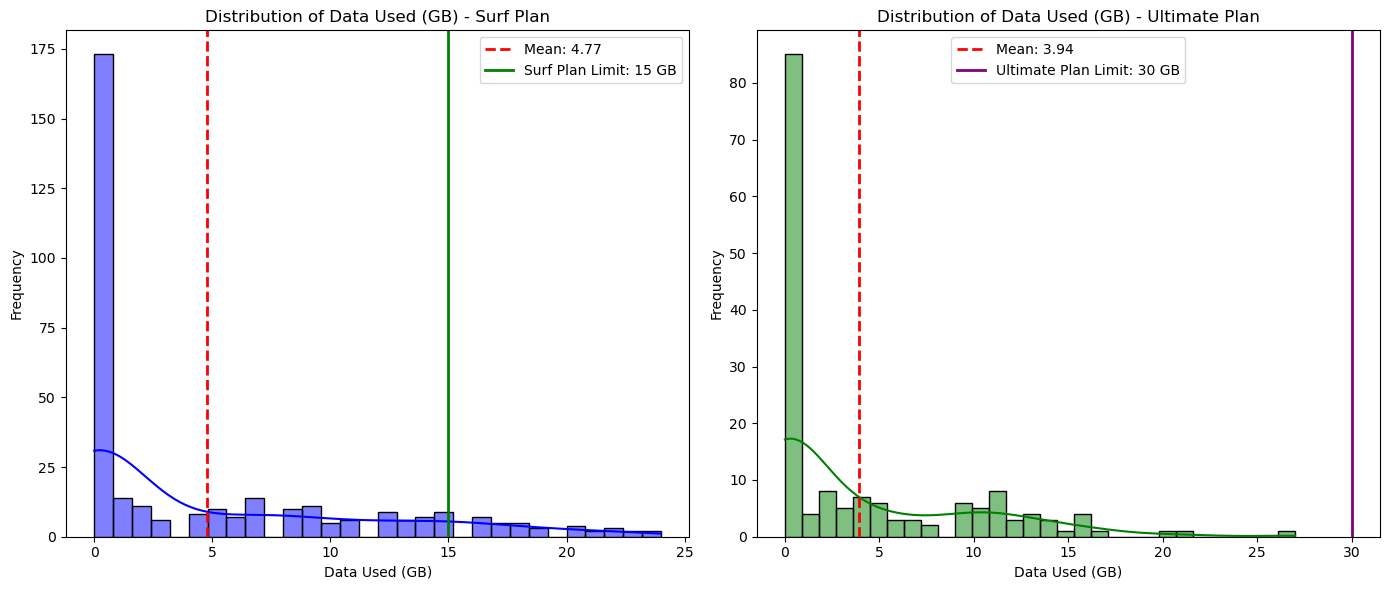

In [9]:
# --- Analysis of Data Volume per Plan ---

# Calculate descriptive statistics for data volume for each plan.
data_stats = user_usage.groupby('plan')['total_data_gb'].agg(['mean', 'var', 'std']).reset_index()
print("Descriptive Statistics for Monthly Data Volume (GB):")
print(data_stats)

# Create histograms to visualize the distribution of data volume for each plan.
plt.figure(figsize=(14, 6))

# Histogram for the Surf plan
plt.subplot(1, 2, 1)
sns.histplot(data=user_usage[user_usage['plan'] == 'surf'], x='total_data_gb', bins=30, color='blue', kde=True)
mean_surf_data = user_usage[user_usage['plan'] == 'surf']['total_data_gb'].mean()
plt.axvline(mean_surf_data, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_surf_data:.2f}')
plt.axvline(15, color='green', linestyle='solid', linewidth=2, label='Surf Plan Limit: 15 GB')
plt.title('Distribution of Data Used (GB) - Surf Plan')
plt.xlabel('Data Used (GB)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the Ultimate plan
plt.subplot(1, 2, 2)
sns.histplot(data=user_usage[user_usage['plan'] == 'ultimate'], x='total_data_gb', bins=30, color='green', kde=True)
mean_ultimate_data = user_usage[user_usage['plan'] == 'ultimate']['total_data_gb'].mean()
plt.axvline(mean_ultimate_data, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ultimate_data:.2f}')
plt.axvline(30, color='purple', linestyle='solid', linewidth=2, label='Ultimate Plan Limit: 30 GB')
plt.title('Distribution of Data Used (GB) - Ultimate Plan')
plt.xlabel('Data Used (GB)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h4 style="color:#2ca02c;">Conclusions on Data Volume Analysis</h4>
<ul>
  <li><strong>High Demand for Data:</strong> Data is clearly a high-demand service. The average monthly data usage for both plans is quite similar, around 16-17 GB.</li>
  <li><strong>Overage is Common for Surf Users:</strong> The average data consumption for <strong>Surf</strong> plan users (16.6 GB) is <strong>above</strong> their 15 GB limit. This is a critical finding: a typical Surf user regularly pays for extra data, which costs a significant $10 per GB.</li>
  <li><strong>Ultimate Users Stay Within Limits:</strong> <strong>Ultimate</strong> plan users, with an average usage of 17.2 GB, comfortably stay within their 30 GB limit. Overage charges for data are likely uncommon for this group.</li>
  <li><strong>Distribution Shape:</strong> The distributions for data usage are the most normally distributed of the three services, centered around the mean. This indicates a more consistent data consumption behavior among users compared to calls and SMS.</li>
</ul>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">5. Hypothesis Testing</h2>

<p>
To provide statistically sound recommendations, we will test two key hypotheses. We will use a significance level (alpha) of 5% for our tests. This means we are willing to accept a 5% chance of incorrectly rejecting a true null hypothesis.
</p>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">5.1. Hypothesis 1: Average revenue from Surf and Ultimate plan users differs.</h3>

<ul>
    <li><strong>Null Hypothesis (H₀):</strong> The average monthly revenue from users of the Surf plan is <strong>equal</strong> to the average monthly revenue from users of the Ultimate plan.</li>
    <li><strong>Alternative Hypothesis (H₁):</strong> The average monthly revenue from users of the Surf plan is <strong>not equal</strong> to the average monthly revenue from users of the Ultimate plan.</li>
</ul>

<p>
This is a two-tailed test because we are checking for any difference, not a specific direction (greater or lesser). We will first check if the variances of the two groups are equal using Levene's test, which will determine the appropriate version of the t-test to use.
</p>

</div>

In [10]:
# --- Hypothesis Test 1: Revenue Difference Between Plans ---

# Set the significance level (alpha)
alpha = 0.05

# Isolate the total revenue for each plan
surf_revenue = user_usage[user_usage['plan'] == 'surf']['total_revenue']
ultimate_revenue = user_usage[user_usage['plan'] == 'ultimate']['total_revenue']

# Print the average revenue for each plan for context
print(f"Average monthly revenue from Surf plan: ${surf_revenue.mean():.2f}")
print(f"Average monthly revenue from Ultimate plan: ${ultimate_revenue.mean():.2f}")
print("-" * 50)

# Step 1: Test for equality of variances using Levene's test.
# This is important to decide whether to assume equal variances in the t-test.
levene_stat, levene_p = stats.levene(surf_revenue, ultimate_revenue)
print(f"Levene's Test Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

# Interpret the result of Levene's test
if levene_p < alpha:
    equal_variances = False
    print("The variances are different. We will use Welch's t-test (equal_var=False).")
else:
    equal_variances = True
    print("The variances are equal. We will use the standard independent t-test (equal_var=True).")
print("-" * 50)

# Step 2: Perform the independent t-test.
# We set `equal_var` based on the result of Levene's test.
t_stat, t_p = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=equal_variances)
print(f"T-test Statistic: {t_stat:.4f}, p-value: {t_p:.4f}")

# Interpret the result of the t-test
# For a two-tailed test, we compare the p-value directly with alpha.
if t_p < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("The average revenue from Surf and Ultimate plan users is significantly different.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is no significant difference in the average revenue between the plans.")

Average monthly revenue from Surf plan: $24.10
Average monthly revenue from Ultimate plan: $70.00
--------------------------------------------------
Levene's Test Statistic: 12.8605, p-value: 0.0004
The variances are different. We will use Welch's t-test (equal_var=False).
--------------------------------------------------
T-test Statistic: -58.3590, p-value: 0.0000

Conclusion: We reject the null hypothesis.
The average revenue from Surf and Ultimate plan users is significantly different.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h4 style="color:#2ca02c;">Conclusion for Hypothesis 1</h4>
<p>
The p-value obtained from the t-test is extremely small (effectively zero), which is far below our significance level of 0.05. Therefore, we <strong>reject the null hypothesis</strong>.
</p>
<p>
This provides strong statistical evidence that the average monthly revenue generated from users of the <strong>Surf</strong> and <strong>Ultimate</strong> plans is significantly different. The descriptive statistics show that the Ultimate plan's average revenue is higher, and this test confirms that the difference is not due to random chance.
</p>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial,sans-serif; line-height: 1.6;">

<h3 style="color:#F5A623;">5.2. Hypothesis 2: Average revenue from users in the NY-NJ area is different from that of users in other regions.</h3>

<ul>
    <li><strong>Null Hypothesis (H₀):</strong> The average monthly revenue from users in the NY-NJ area is <strong>equal</strong> to the average monthly revenue from users in other regions.</li>
    <li><strong>Alternative Hypothesis (H₁):</strong> The average monthly revenue from users in the NY-NJ area is <strong>not equal</strong> to the average monthly revenue from users in other regions.</li>
</ul>

<p>
Similar to the first hypothesis, this is a two-tailed test. We will again use Levene's test to check for variance equality before performing the appropriate t-test.
</p>

</div>

In [11]:
# --- Hypothesis Test 2: Revenue Difference Between Regions ---

# Identify users in the NY-NJ area vs. other regions.
# The `str.contains` method allows for flexible matching of city names.
user_usage['is_ny_nj'] = user_usage['city'].str.contains('New York|New Jersey|NY|NJ|Newark', case=False, na=False)

# Isolate the total revenue for each region
ny_nj_revenue = user_usage[user_usage['is_ny_nj']]['total_revenue']
other_revenue = user_usage[~user_usage['is_ny_nj']]['total_revenue']

# Print the average revenue for each region for context
print(f"Average monthly revenue from NY-NJ area: ${ny_nj_revenue.mean():.2f}")
print(f"Average monthly revenue from other regions: ${other_revenue.mean():.2f}")
print("-" * 50)

# Step 1: Test for equality of variances using Levene's test.
levene_stat, levene_p = stats.levene(ny_nj_revenue, other_revenue)
print(f"Levene's Test Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

# Interpret the result of Levene's test
if levene_p < alpha:
    equal_variances_region = False
    print("The variances are different. We will use Welch's t-test (equal_var=False).")
else:
    equal_variances_region = True
    print("The variances are equal. We will use the standard independent t-test (equal_var=True).")
print("-" * 50)

# Step 2: Perform the independent t-test.
t_stat_region, t_p_region = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=equal_variances_region)
print(f"T-test Statistic: {t_stat_region:.4f}, p-value: {t_p_region:.4f}")

# Interpret the result of the t-test
if t_p_region < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("The average revenue from users in the NY-NJ area is significantly different from other regions.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is no significant difference in the average revenue between the NY-NJ area and other regions.")

Average monthly revenue from NY-NJ area: $37.39
Average monthly revenue from other regions: $39.29
--------------------------------------------------
Levene's Test Statistic: 0.5046, p-value: 0.4778
The variances are equal. We will use the standard independent t-test (equal_var=True).
--------------------------------------------------
T-test Statistic: -0.7103, p-value: 0.4778

Conclusion: We fail to reject the null hypothesis.
There is no significant difference in the average revenue between the NY-NJ area and other regions.


<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h4 style="color:#2ca02c;">Conclusion for Hypothesis 2</h4>
<p>
The p-value from this test is approximately 0.478, which is much larger than our 0.05 significance level. Therefore, we <strong>fail to reject the null hypothesis</strong>.
</p>
<p>
This means there is no statistically significant evidence to suggest that the average monthly revenue from users in the New York-New Jersey area is different from that of users in other regions. While the sample means might show a slight difference, this is likely due to random variation in the data, and we cannot conclude that a real difference exists in the overall population.
</p>

</div>

<div style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; line-height: 1.6;">

<h2 style="color:#4A90E2; border-bottom: 1px solid #4A90E2; padding-bottom: 5px;">6. Overall Conclusion and Recommendations</h2>

<p>
This analysis aimed to determine which of Megaline's prepaid plans, Surf or Ultimate, generates more revenue and to understand the underlying customer behaviors driving these financial results. After a thorough process of data cleaning, aggregation, exploratory analysis, and statistical testing, we have arrived at several key findings.
</p>

<h3 style="color:#F5A623;">Summary of Findings</h3>
<ol>
  <li>
    <strong>Revenue Difference is Significant:</strong> The statistical tests confirmed that the <strong>Ultimate plan generates significantly higher average revenue per user</strong> than the Surf plan. While the Surf plan has more users who pay for overages, the high base fee of the Ultimate plan more than compensates for this, making it the more profitable plan on a per-customer basis.
  </li>
  <li>
    <strong>Data is the Key Driver for Overage:</strong> The primary driver of extra charges for Surf plan users is data consumption. The average Surf user consumes more data than their 15 GB allowance, frequently resulting in additional fees at a steep rate of $10/GB. In contrast, usage of extra minutes and SMS is less common.
  </li>
  <li>
    <strong>Ultimate Plan Offers Peace of Mind:</strong> Ultimate plan users rarely exceed their generous allowances for calls, messages, or data. This plan effectively serves customers with high usage needs, providing them with cost certainty and preventing unexpected bills.
  </li>
  <li>
    <strong>No Regional Difference in Revenue:</strong> Our analysis showed no significant difference in average revenue between customers in the New York-New Jersey area and those in other regions. This suggests that marketing strategies do not need to be geographically differentiated based on revenue generation.
  </li>
</ol>

<h3 style="color:#F5A623;">Strategic Recommendations for the Business</h3>
<p>
Based on these data-driven insights, the following recommendations are proposed for the commercial department:
</p>
<ul>
  <li>
    <strong style="color:#1f77b4;">Focus Advertising on the Ultimate Plan:</strong> Since the Ultimate plan is the primary revenue driver per customer, the advertising budget should be concentrated on promoting its benefits. Marketing campaigns should highlight the value proposition of "worry-free" usage with generous limits, targeting customers who value predictability and have high data needs.
  </li>
  <li>
    <strong style="color:#d62728;">Upsell High-Spending Surf Customers:</strong> Identify Surf plan users who consistently pay significant overage fees, particularly for data. These customers are ideal candidates for an upselling campaign to switch to the Ultimate plan. A targeted offer could demonstrate how they might save money or get more value by upgrading, thus increasing customer satisfaction and securing a higher, more stable revenue stream for Megaline.
  </li>
  <li>
    <strong style="color:#2ca02c;">Consider a "Surf Plus" Tier:</strong> There appears to be a gap in the market for users whose needs fall between the current Surf and Ultimate plans. Megaline could consider introducing a mid-tier plan (e.g., "Surf Plus") that offers a more generous data allowance (e.g., 25-30 GB) for a moderate price increase. This could capture revenue from Surf users who need more data but are not willing to pay the full price for the Ultimate plan.
  </li>
</ul>
<p>
By implementing these strategies, Megaline can better align its product offerings with customer behavior, optimize its revenue streams, and enhance overall customer satisfaction.
</p>

</div>